<a href="https://colab.research.google.com/github/NUELBUNDI/Syndicate-3-CSA-Projects/blob/main/syndicate_3_CSA_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline\
from google.colab import files
from google.colab import drive

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train = pd.read_csv("C:\\Users\\Lbundi\Desktop\\Jupyter notebook\\CDS Project\\application_train.csv")
test = pd.read_csv("C:\\Users\\Lbundi\Desktop\\Jupyter notebook\\CDS Project\\application_test.csv")

## **Exploratory Data Analysis**

**First 5 rows**

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Shape of the data**

In [ ]:
print("The application_train.csv has {} entires.".format(train.shape))
print("The application_test.csv has {} entires.".format(test.shape))

The application_train.csv has (307511, 122) entires.
The application_test.csv has (48744, 121) entires.


**Available columns and total number of columns**

In [ ]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

**Checking the datatypes**

In [ ]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
train.select_dtypes(include=['object']).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

**Check out the stats**

In [ ]:
train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


**Overview of the data**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### **Who is the highest borrower? Male or Female?**

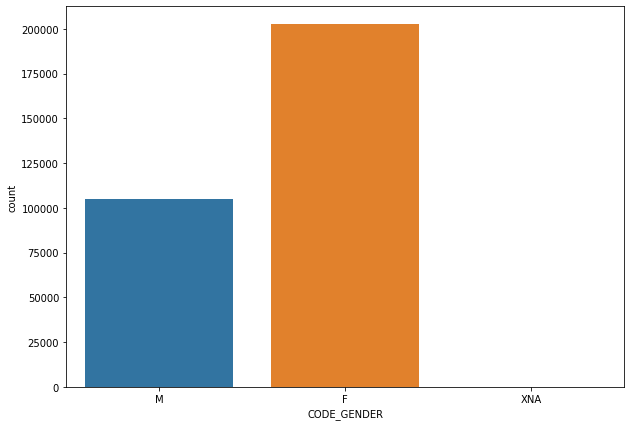

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=train)
plt.show()

In [ ]:
print("Females are the highest borrowers with counts:\n{}".format(train.CODE_GENDER.value_counts()))

Females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


### **How is the distribution of target labels? - Did most people return on time ?**

0: Loan was repaid       1: Loan was not repaid 

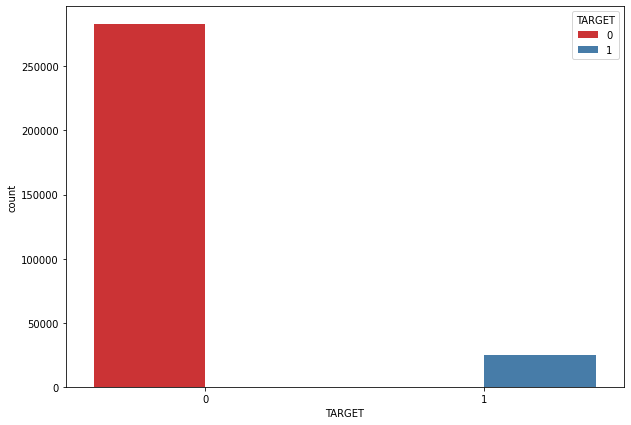

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=train, hue='TARGET',palette="Set1")
plt.show()
# Change the color

In [ ]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Based on the description, most people returned the money. Very clearly the target label is imbalanced.

### **Who are the major borrowers? - What are their occupations?**

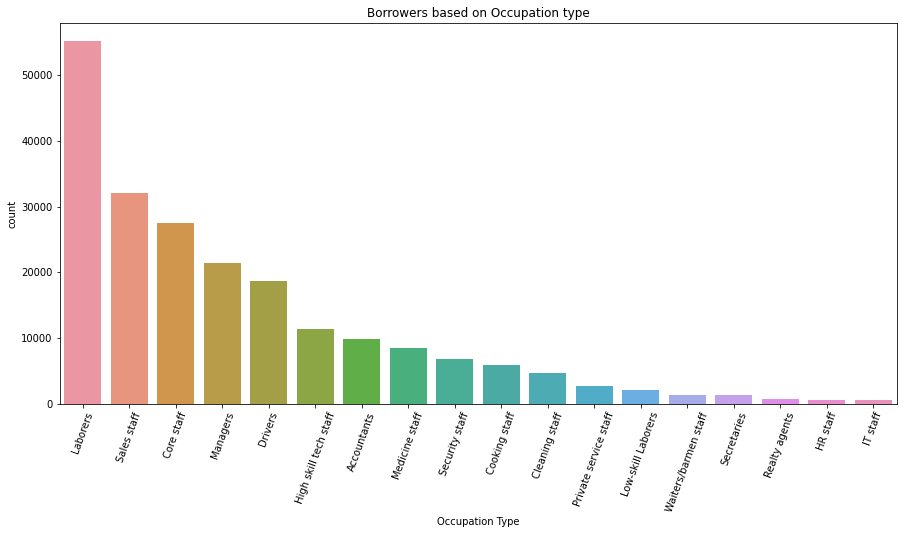

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=train,order=train['OCCUPATION_TYPE'].value_counts().index)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)
plt.title('Borrowers based on Occupation type')
plt.show()

Most of the clients who borrow are laborers and the least of the clients are IT Staff.


### **How economically stable are clients? Who are the most and least stable?**

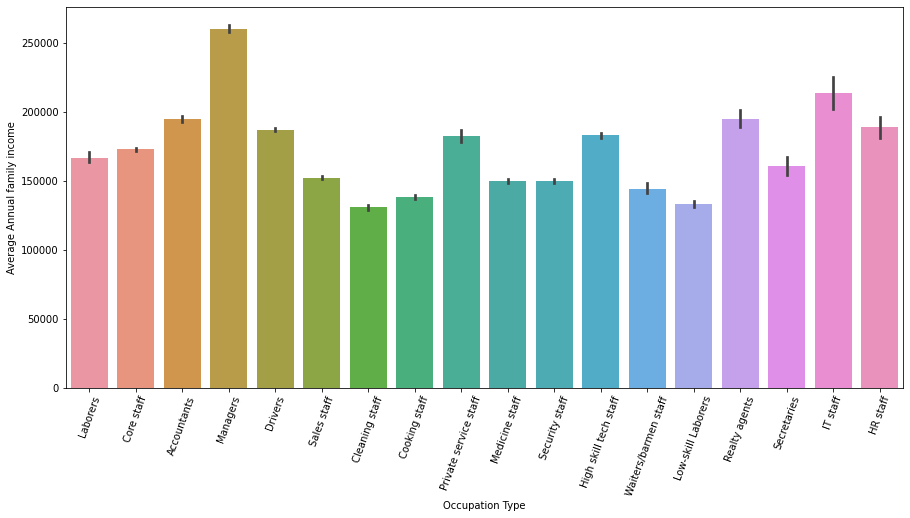

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")
plt.show()

# To order the the bargraphs

Managers are the most earning borrowers while cleaning staff are the least earning borrowers - Based on the annual family income.

### **Which category of occupants repay on time and are better clients for company to lend money?**

Text(0.5, 0, 'Occupation Type')

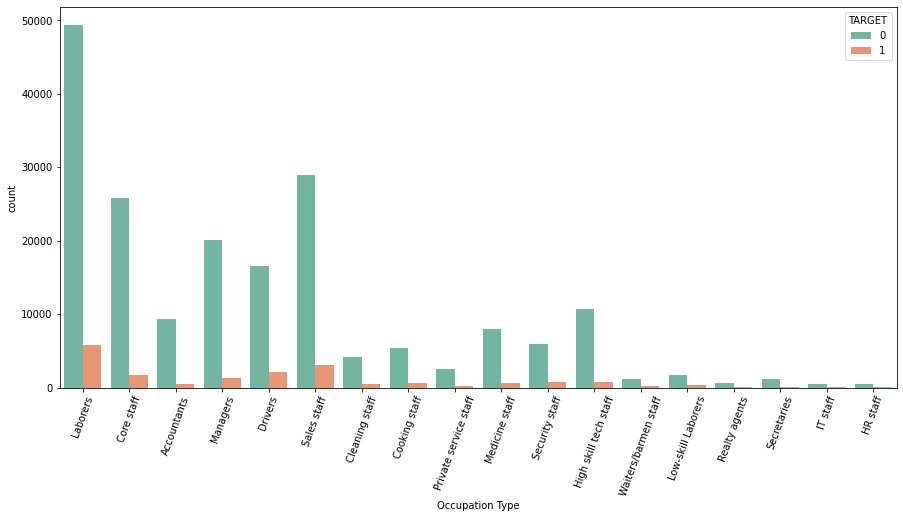

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.show()


Right off the bat, it seems as if the labourers have the highest difficulty in repaying. Also it seems lending to Reality agents, IT staff, HR staff is the safest.

**This is not a better way to conclude, because this contains baised number of applicants.**

**A better way is to find a metric that incorporates relative relationship between applicants count and repayers count.**


### Let us look at the number of repayer's to number of applicants ratio in every occupation category.

In [ ]:
# get the number of people having occupation type and target grouped.
Occupation_df = pd.DataFrame(data=train.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])
Occupation_df

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0             9339
                      1              474
Cleaning staff        0             4206
                      1              447
Cooking staff         0             5325
                      1              621
Core staff            0            25832
                      1             1738
Drivers               0            16496
                      1             2107
HR staff              0              527
                      1               36
High skill tech staff 0            10679
                      1              701
IT staff              0              492
                      1               34
Laborers              0            49348
                      1             5838
Low-skill Laborers    0             1734
                      1              359
Managers              0            20043
                      1             1328
Medicine staff        0             7965
                      1              572
Private service staff 0             2477
                      1              175
Realty agents         0              692
                      1               59
Sales staff           0            29010
                      1             3092
Secretaries           0             1213
                      1               92
Security staff        0             5999
                      1              722
Waiters/barmen staff  0             1196
                      1              152

In [ ]:
# reset the multiindex organization of dataframe.

Occupation_df = Occupation_df.reset_index() 
Occupation_df

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [ ]:
# get the number of people grouped on type of occupation and target in an array form.

value_counts = Occupation_df['SK_ID_CURR'].values
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152],
      dtype=int64)

In [ ]:
def repayers_to_applicants_ratio(values):
    
    """
    Finds the ratio of Repayers to Applicants. This kind of is a 
    measure for safety. Larger the value better the applicant - More 
    safe for the company to lend loan to this category of workers.
    
    values: array of entires whose counts are given
    returns the repayers to applicants ratio. 
    
    precondition: The counts are such that the targets alligned are
    in order 0 and 1
    """
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios       

In [ ]:
# find the ratios from the array values
Occupation_df['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)
Occupation_df['Ratio R/A'] 

,OCCUPATION_TYPE,TARGET,SK_ID_CURR,Ratio R/A
0,Accountants,0,9339,0.951697
1,Accountants,1,474,0.951697
2,Cleaning staff,0,4206,0.903933
3,Cleaning staff,1,447,0.903933
4,Cooking staff,0,5325,0.895560
5,Cooking staff,1,621,0.895560
6,Core staff,0,25832,0.936960
7,Core staff,1,1738,0.936960
8,Drivers,0,16496,0.886739
9,Drivers,1,2107,0.886739


### **Repayment ratio based on Occupation Type.**

In [ ]:
# get the ratio and values based on the order of saftety.

Occupation_ratio_df = Occupation_df.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
Occupation_ratio_df = Occupation_ratio_df.reset_index() 
Occupation_ratio_df = Occupation_ratio_df.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio_df

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

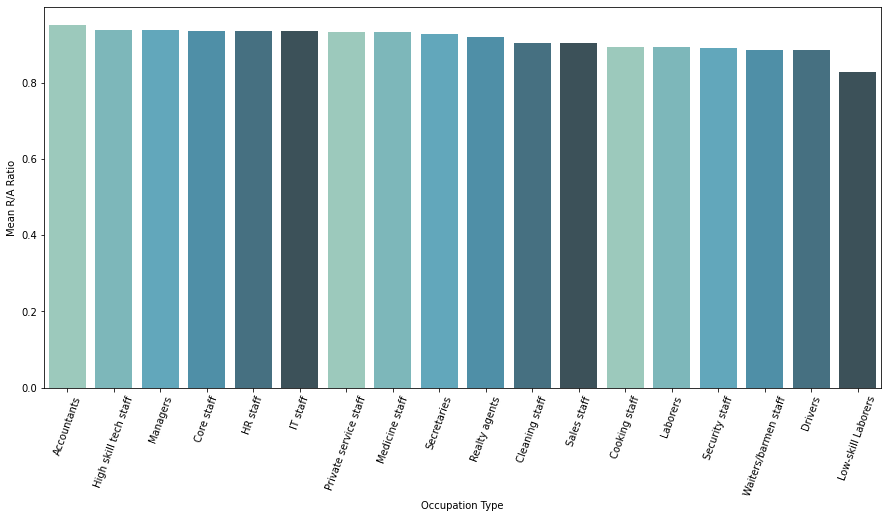

In [ ]:
# Occupation type and occupation based repayment to applicants ratio.
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio_df,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Mean R/A Ratio")

According to the ratio of Number of repayers to Number of applicants in every occupation type, we see that it is most safe to lend money to Accountants with an R/A ratio of 0.9516 and it is least safe to lend money to low skilled labourers with an R/A ratio of 0.8284

### **How is the distribution of males and females in terms of loan safety given that they belong to a specific occupation?**
**find the probabilities of repaying given a specific gender and a specific occupation type.**

In [ ]:
# merge the new column 'Ratio R/A' to the train dataframe.
train = pd.merge(left=train,right=Occupation_ratio_df,on='OCCUPATION_TYPE')
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A_x,Ratio R/A_y,Ratio R/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.894212,0.894212
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.894212,0.894212
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.894212,0.894212,0.894212
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.894212,0.894212,0.894212
4,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.894212,0.894212,0.894212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211115,454388,0,Cash loans,F,N,Y,1,225000.0,491823.0,25240.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.936057,0.936057
211116,454756,0,Revolving loans,F,N,N,0,81000.0,180000.0,9000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.936057,0.936057,0.936057
211117,455325,0,Cash loans,F,N,Y,0,162000.0,450000.0,14373.0,...,0,0.0,0.0,0.0,0.0,2.0,5.0,0.936057,0.936057,0.936057
211118,455602,0,Cash loans,M,N,Y,1,292500.0,536917.5,30109.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.936057,0.936057,0.936057


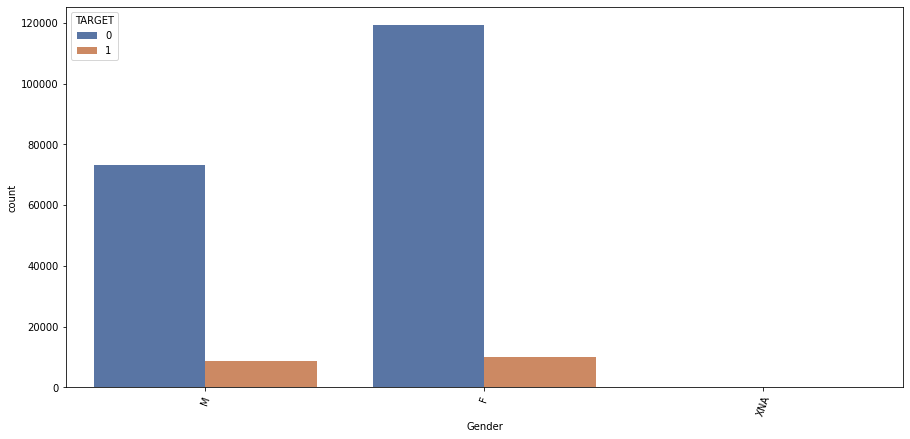

In [ ]:
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=train,hue='TARGET',palette=sns.color_palette("deep"))
plt.xticks(rotation=70)
plt.xlabel("Gender")
plt.show()



In [ ]:
# Story line= Girl child and loans

In [ ]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
pd.DataFrame(train.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index() 

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,119311
1,F,1,9971
2,M,0,73260
3,M,1,8576
4,XNA,0,2


In [ ]:
### To find out the probability here's what we have to do:
print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952") 
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


In [ ]:
# Let us create a new dataframe where the probabilites of repaying based on gender is included. GR/A stands
# for Gender based repayment ratio.
gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})
gender_repay_ratio 

,CODE_GENDER,GR/A
0,M,0.8952
1,F,0.9228


In [ ]:
# Merge this dataframe with the old train dataframe
train = pd.merge(left=train,right=gender_repay_ratio,on='CODE_GENDER')
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A_x,Ratio R/A_y,Ratio R/A,GR/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.894212,0.894212,0.8952
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.894212,0.894212,0.8952
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,0.894212,0.894212,0.894212,0.8952
3,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.894212,0.894212,0.894212,0.8952
4,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.894212,0.894212,0.8952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,453306,0,Revolving loans,F,Y,N,0,81000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.936057,0.936057,0.9228
211114,453456,0,Cash loans,F,N,N,0,135000.0,675000.0,17937.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.936057,0.936057,0.9228
211115,454388,0,Cash loans,F,N,Y,1,225000.0,491823.0,25240.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.936057,0.936057,0.9228
211116,454756,0,Revolving loans,F,N,N,0,81000.0,180000.0,9000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.936057,0.936057,0.936057,0.9228


In [ ]:
# lets create a new column that's indicative of repayment with gender and occupation type which is just the product of Ratio R/A with G R/A.
# EGR/A stands for employment gender repayment ratio.
train['EGR/A'] = train['Ratio R/A']*train['GR/A']

In [ ]:
train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A_x,Ratio R/A_y,Ratio R/A,GR/A,EGR/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,0.894212,0.894212,0.894212,0.8952,0.800499
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.894212,0.894212,0.894212,0.8952,0.800499


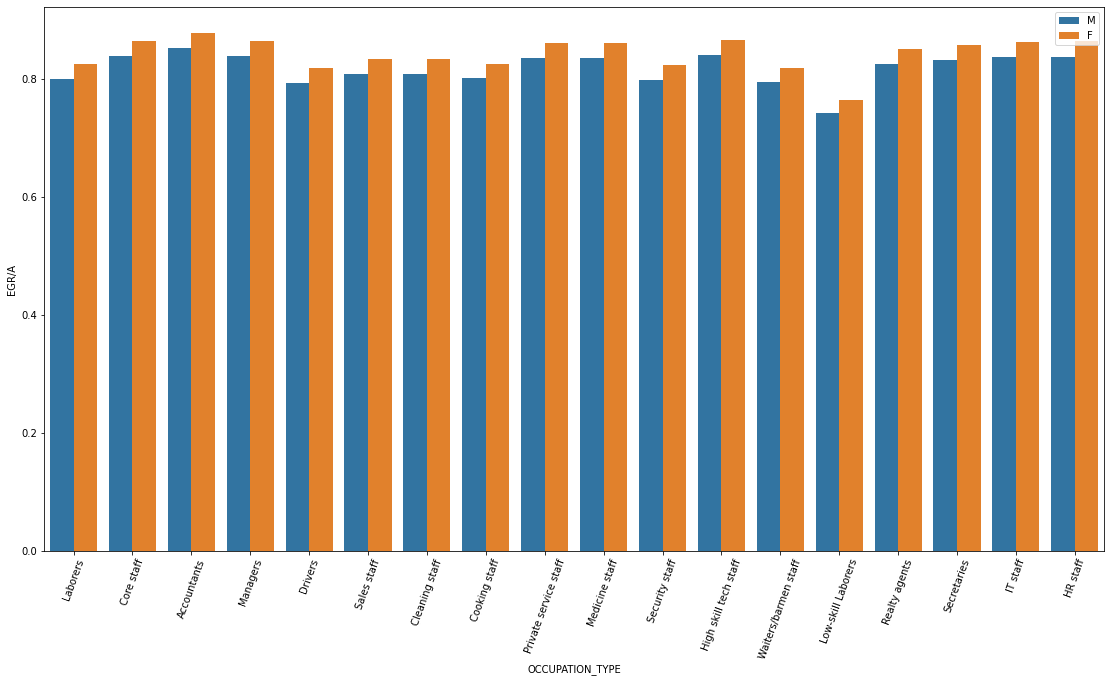

In [ ]:
fig,ax = plt.subplots(figsize = (19,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=train)
plt.legend(loc=1)
plt.show()


So, in every occupation type, females are more likely to repay the loan on time.

### **Which occupation category are the highest loan recipients?**

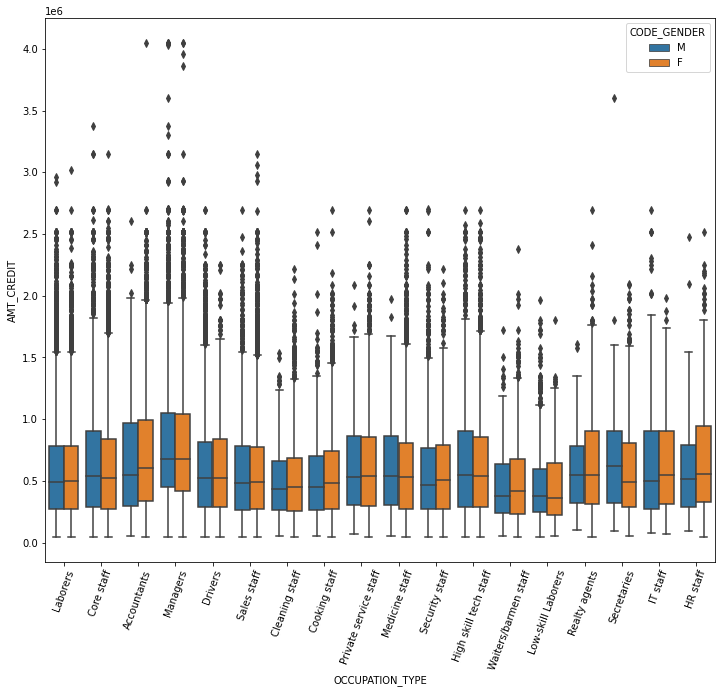

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=train,hue='CODE_GENDER')
plt.xticks(rotation=70)
plt.show()

In [ ]:
# To check medicine staff feature.

# The number of counts per gender in each occupation
# Hitmap

- Accountants and Managers are the highest amount recipents, while low skilled laborers are the least recipents (let me make it clear- labourers are highest volume based applicants, but not large recipents ). 
- It makes sense because accountants are more likely to get a large credit approved as opposed to low skilled laborers - which was kinda explained through Ratio R/A.

In [ ]:
ext_data = train[['TARGET', 'AMT_INCOME_TOTAL','REGION_RATING_CLIENT', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,AMT_INCOME_TOTAL,REGION_RATING_CLIENT,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.005368,0.063884,-0.180326,0.065902
AMT_INCOME_TOTAL,-0.005368,1.000000,-0.074203,-0.020570,-0.022779
REGION_RATING_CLIENT,0.063884,-0.074203,1.000000,-0.013731,0.044972
EXT_SOURCE_3,-0.180326,-0.020570,-0.013731,1.000000,-0.177927
DAYS_BIRTH,0.065902,-0.022779,0.044972,-0.177927,1.000000


<AxesSubplot:>

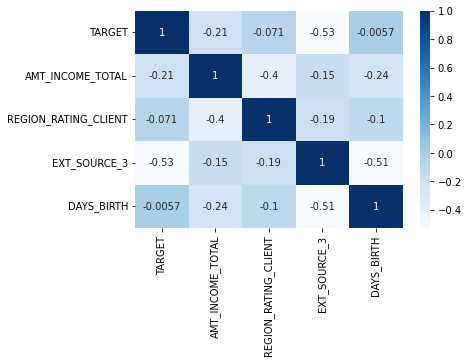

In [ ]:
sns.heatmap(ext_data_corrs.corr(),cmap='Blues',annot=True)

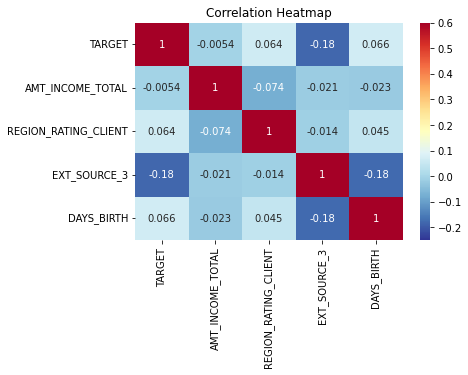

In [ ]:
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');